# K-Means Clustering :

in this problem we have to implement the k-means clustering algorithm, using sixteen clusters (n=16). we will store the 
means in a array called "centers" and also print out the same to remove any confiusion at the end.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymatreader as reader
import matplotlib.pyplot as plt

In [3]:
data = reader.read_mat('yeastData310.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jan 16 21:48:41 2008',
 '__version__': '1.0',
 '__globals__': [],
 'genes': ['YAL012W',
  'YAL034C',
  'YAL061W',
  'YBR048W',
  'YBR052C',
  'YBR072W',
  'YBR169C',
  'YBR183W',
  'YBR241C',
  'YBR287W',
  'YCL060C',
  'YCR019W',
  'YDL124W',
  'YDL148C',
  'YDL204W',
  'YDR074W',
  'YDR096W',
  'YDR144C',
  'YDR148C',
  'YDR258C',
  'YDR272W',
  'YDR316W',
  'YEL011W',
  'YEL024W',
  'YFL014W',
  'YFR018C',
  'YGL062W',
  'YGL138C',
  'YGL158W',
  'YGL184C',
  'YGR043C',
  'YGR201C',
  'YGR225W',
  'YHL033C',
  'YIL098C',
  'YIL166C',
  'YIR039C',
  'YJL144W',
  'YKL035W',
  'YKL067W',
  'YKL085W',
  'YKL091C',
  'YLR164W',
  'YLR168C',
  'YLR174W',
  'YLR196W',
  'YLL041C',
  'YLL023C',
  'YLR270W',
  'YLR312C',
  'YLR356W',
  'YML042W',
  'YML100W',
  'YML120C',
  'YML131W',
  'YMR131C',
  'YMR181C',
  'YNL015W',
  'YNL037C',
  'YNL061W',
  'YNL173C',
  'YNL175C',
  'YNL301C',
  'YNL303W',
  'YOL120C',
  'YOR032

In [5]:
X = data['X']
t = data['times']

In [6]:
from scipy.spatial.distance import cdist

In [7]:
def KMeans(X,K, epochs):
    idx = np.random.choice(len(X), K, replace=False)
    
    #Randomly choosing Centroids #Step 1
    centroids = X[idx, :] 
    
    
    #finding the distance between centroids and all the data points #Step 2
    
    distances = cdist(X, centroids ,'euclidean')
    
    
    #Centroid with the minimum Distance #Step 3 
    points = np.array([np.argmin(i) for i in distances]) 
    
    
    #Repeating the above steps for a defined number of iterations #Step 4
    
    for _ in range(epochs): 
        centroids = []
        for idx in range(K):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = X[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(X, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points , centroids

In [8]:
y, centers = KMeans(X=X, K=16, epochs=3000)

In [9]:
output = pd.DataFrame(np.concatenate([X,y.reshape(310,1)], axis=1), columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'cluster_no'])

In [10]:
output.head()

,X1,X2,X3,X4,X5,X6,X7,cluster_no
0,0.157,0.175,0.467,-0.379,-0.520,-1.279,-2.125,7.0
1,-0.235,0.487,-0.184,-0.669,-1.006,2.369,2.611,5.0
2,-0.532,0.028,-0.333,-0.102,1.172,2.087,0.992,9.0
3,0.224,0.274,-0.002,-0.211,-0.760,-1.524,-2.145,7.0
4,0.049,0.105,0.650,1.310,0.917,2.401,1.715,10.0


In [11]:
for i in range(centers.shape[0]):
    print('[')
    for j in range(centers.shape[1]): 
        print(f"{centers[i][j]}", end=',  ')
    print(']')
    print('\n')
    print('\n')

[
-0.872875,  -1.2681250000000002,  -0.05962500000000001,  0.125125,  -0.21462500000000004,  1.921375,  2.3165,  ]




[
-1.2554166666666666,  -2.182166666666667,  0.041666666666666664,  -0.2014166666666667,  -0.3672500000000001,  1.0349166666666667,  0.7825833333333332,  ]




[
0.02949999999999998,  0.47475,  1.45525,  1.4772500000000002,  1.79575,  0.86225,  1.33925,  ]




[
-0.101,  0.3086,  0.9402000000000001,  1.9072999999999998,  2.1529000000000003,  3.5075000000000003,  3.4562000000000004,  ]




[
0.04926666666666667,  0.1196,  0.10746666666666667,  0.4956000000000001,  1.0615333333333337,  1.3519999999999999,  2.527933333333334,  ]




[
-0.013833333333333338,  0.6695000000000001,  -0.020499999999999987,  -0.136,  -0.314,  1.9756666666666665,  2.596833333333333,  ]




[
-0.8253,  -1.2539,  -0.23220000000000002,  -0.3088,  -2.6533,  1.1658000000000002,  0.9142999999999999,  ]




[
0.2125294117647058,  0.17823529411764702,  0.07241176470588237,  -0.4742647058823529,  -0.5268

above are the computed centroids, they are  7 x 1 vectors as we have our dataset in a seven dimensional space. 

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

X_2 = pca.fit_transform(X_scaled)

In [18]:
two_dimensional_data = pd.DataFrame(np.concatenate([X_2,y.reshape(310,1)], axis=1), columns=['feat_1', 'feat_2', 'cluster_no'])

/Users/adityagarg/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feat_1', ylabel='feat_2'>

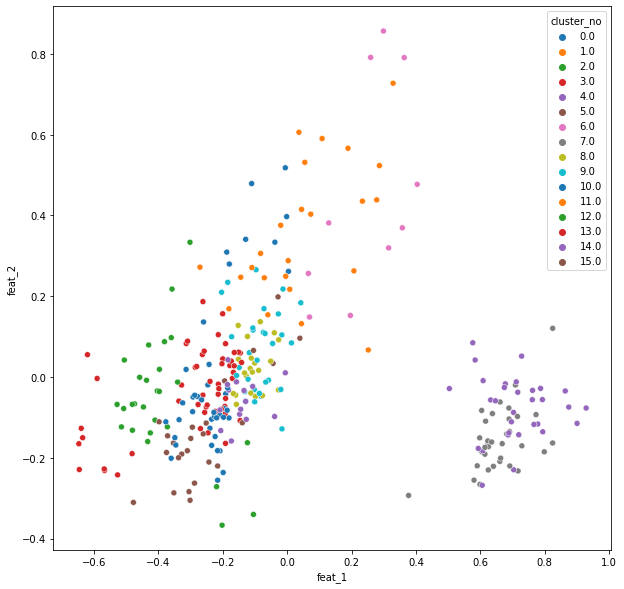

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(two_dimensional_data['feat_1'], two_dimensional_data['feat_2'], hue = two_dimensional_data['cluster_no'],palette = "tab10" )